In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
import sympy 
from sympy import banded, symbols, print_latex, oo
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import wofz 

In [3]:
%matplotlib inline
import matplotlib
font = {'family' : 'serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

## Asymmetrically Weighted Hermite Linear Response Function

In [4]:
# number of moments
Nv = 4

In [5]:
# symbolic variables
xi = symbols('xi') 
k = symbols('k', integer = True)

In [6]:
# advection matrix (off-diagonal)
vec = sympy.zeros(Nv)
for jj in range(1, Nv+1):
    vec[jj-1] = sympy.sqrt(jj)/ (sympy.sqrt(2))

In [7]:
# create advection tri-diagonal matrix
A = banded({1: tuple(vec[0, :-1]), -1: tuple(vec[0, :-1])})

In [8]:
A

Matrix([
[        0, sqrt(2)/2,         0,         0],
[sqrt(2)/2,         0,         1,         0],
[        0,         1,         0, sqrt(6)/2],
[        0,         0, sqrt(6)/2,         0]])

In [9]:
# idenitity matrix
I = np.eye(Nv, dtype=int)

In [10]:
# invert matrix
M = sympy.Matrix(I*xi - k/np.abs(k) * A)

In [11]:
# get final response function 
R_approx = sympy.simplify(-sympy.simplify(M.inv()[0, 1]/sympy.sqrt(2)) * k / np.abs(k))

In [12]:
# print 
R_approx

(3 - 2*xi**2)/(4*xi**4 - 12*xi**2 + 3)

In [13]:
# latex code
print_latex(R_approx)

\frac{3 - 2 \xi^{2}}{4 \xi^{4} - 12 \xi^{2} + 3}


## Pole Analysis

In [14]:
num, denom = sympy.fraction(R_approx)

In [15]:
sympy.nroots(denom)

[-1.65068012388578, -0.524647623275290, 0.524647623275290, 1.65068012388578]

## Asymptotic Expansion

### Adiabatic limit $\xi \to 0$

In [16]:
asymptotics_0 = R_approx.series(xi, 0, 6)

In [17]:
asymptotics_0

1 + 10*xi**2/3 + 12*xi**4 + O(xi**6)

In [18]:
print_latex(asymptotics_0)

1 + \frac{10 \xi^{2}}{3} + 12 \xi^{4} + O\left(\xi^{6}\right)


### Fluid (cold plasma) limit $\xi \to \infty$

In [19]:
asymptotics_inf = R_approx.series(xi, oo, 16)

In [20]:
asymptotics_inf

-13095/(128*xi**14) - 2403/(64*xi**12) - 441/(32*xi**10) - 81/(16*xi**8) - 15/(8*xi**6) - 3/(4*xi**4) - 1/(2*xi**2) + O(xi**(-16), (xi, oo))

In [21]:
print_latex(asymptotics_inf)

- \frac{13095}{128 \xi^{14}} - \frac{2403}{64 \xi^{12}} - \frac{441}{32 \xi^{10}} - \frac{81}{16 \xi^{8}} - \frac{15}{8 \xi^{6}} - \frac{3}{4 \xi^{4}} - \frac{1}{2 \xi^{2}} + O\left(\frac{1}{\xi^{16}}; \xi\rightarrow \infty\right)


## Comparison of the AW Hermite approximation

In [42]:
def Z_fun(z):
    return 1j*np.sqrt(np.pi)*wofz(z)

def R(xi):
    return (1 + xi*Z_fun(xi))
    
def U(xi):
    return xi*R(xi)

def R3(xi):
    return -1/(2*(xi**2) - 3)

def R4(xi):
    return -(2*(xi**2) - 3)/(4*(xi**4) - 12*(xi**2) + 3)

def R5(xi):
    return -(2*(xi**2) - 7)/(4*(xi**4) - 20*(xi**2) + 15)

def R6(xi):
    return -(4*(xi**4) - 24*(xi**2) + 15)/(8*(xi**6) - 60*(xi**4) + 90*(xi**2) - 15)

def R7(xi):
    return -(4*(xi**4) - 36*(xi**2) + 57)/(8*(xi**6) - 84*(xi**4) + 210*(xi**2) - 105)

In [43]:
# define the xi along the real axis 
xi = 10**np.linspace(-3, 3, int(1e5))

In [44]:
R_3 = R3(xi)
R_4 = R4(xi)
R_5 = R5(xi)
R_6 = R6(xi)
R_true = R(xi)
U_true = U(xi)

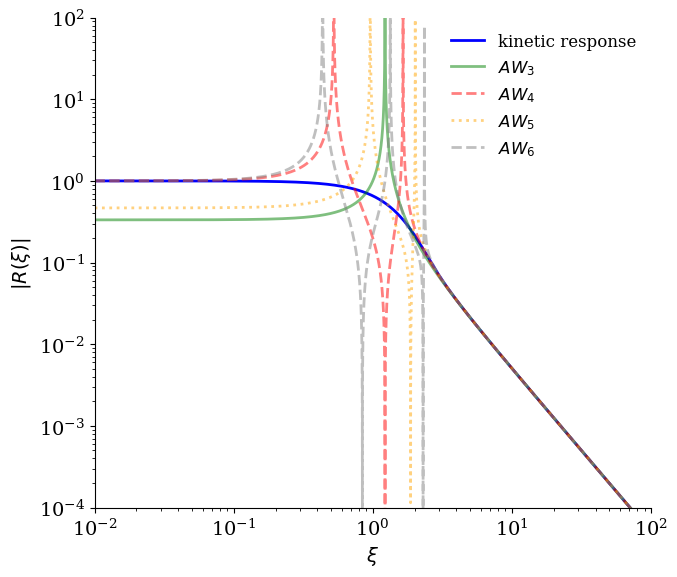

In [25]:
fig, ax = plt.subplots(figsize=(7, 6))

ax.plot(xi, np.abs(R_true), label=r"kinetic response", c="blue", linewidth=2)
ax.plot(xi, np.abs(R_3), label=r"$AW_{3}$", c="green", ls="-", linewidth=2, alpha=0.5)
ax.plot(xi, np.abs(R_4), label=r"$AW_{4}$", c="red", ls="--", linewidth=2, alpha=0.5)
ax.plot(xi, np.abs(R_5), label=r"$AW_{5}$", c="orange", ls=":", linewidth=2, alpha=0.5)
ax.plot(xi, np.abs(R_6), label=r"$AW_{6}$", c="grey", ls="--", linewidth=2, alpha=0.5)
ax.set_ylim(10**-4, 10**2)
ax.set_yscale("log")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel(r"$|R(\xi)|$")
ax.set_xlabel(r"$\xi$")
ax.set_xscale("log")
ax.set_xlim(1e-2, 1e2)
legend = ax.legend(ncols=1, fancybox=False, shadow=False, fontsize=12, loc='upper right')
legend.get_frame().set_alpha(0)
plt.tight_layout()
plt.savefig("figs/symbolic_response_function_AW.png", dpi=300)

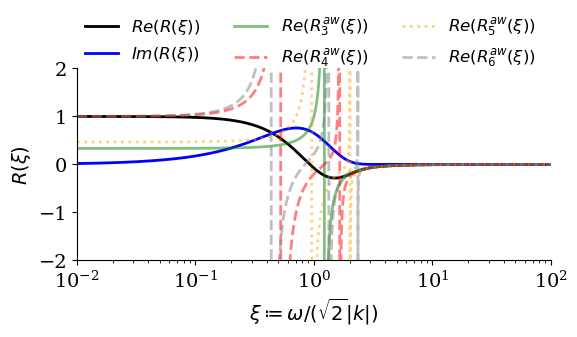

In [26]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(xi, np.real(R_true), label=r"$Re(R(\xi))$", c="black", linewidth=2)
ax.plot(xi, np.imag(R_true), label=r"$Im(R(\xi))$", c="blue", linewidth=2)
ax.plot(xi, np.real(R_3), label=r"$Re(R_{3}^{aw}(\xi))$", c="green", ls="-", linewidth=2, alpha=0.5)
ax.plot(xi, np.real(R_4), label=r"$Re(R_{4}^{aw}(\xi))$", c="red", ls="--", linewidth=2, alpha=0.5)
ax.plot(xi, np.real(R_5), label=r"$Re(R_{5}^{aw}(\xi))$", c="orange", ls=":", linewidth=2, alpha=0.5)
ax.plot(xi, np.real(R_6), label=r"$Re(R_{6}^{aw}(\xi))$", c="grey", ls="--", linewidth=2, alpha=0.5)

ax.set_ylim(-2, 2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel(r"$R(\xi)$")
ax.set_xlabel(r"$\xi \coloneq \omega/(\sqrt{2} |k|)$")
ax.set_xscale("log")
ax.set_yticks([-2, -1, 0, 1, 2])
ax.set_xlim(1e-2, 1e2)
legend = ax.legend(ncols=3, fancybox=False, shadow=False, fontsize=12, loc='upper right', bbox_to_anchor=(1, 1.35))
legend.get_frame().set_alpha(0)
plt.tight_layout()
plt.savefig("figs/symbolic_response_function_AW.png", dpi=300, bbox_inches='tight')

# Density Response Function 

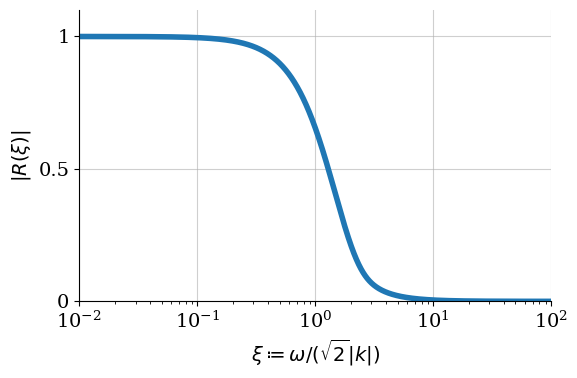

In [65]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(xi, np.abs(R_true), c="tab:blue", linewidth=4)

ax.set_ylim(0, 1.1)
#ax.set_yscale("log")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel(r"$|R(\xi)|$")
ax.set_xlabel(r"$\xi \coloneq \omega/(\sqrt{2} |k|)$")
ax.set_xscale("log")
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels([0, 0.5, 1])
ax.set_xlim(1e-2, 1e2)
plt.tight_layout()
plt.grid(alpha=0.6)
plt.savefig("figs/denisty_magnitude_response.png", dpi=300, bbox_inches='tight')

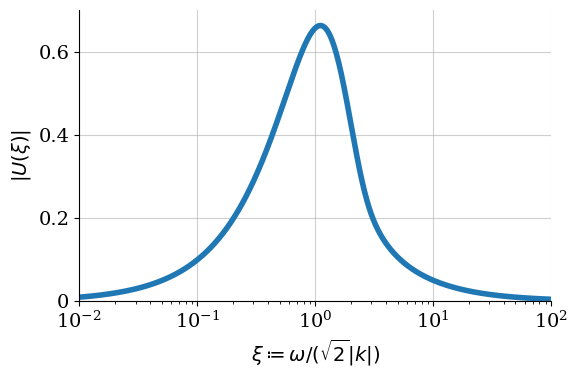

In [63]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(xi, np.abs(U_true), c="tab:blue", linewidth=4)

ax.set_ylim(0, 0.7)
#ax.set_yscale("log")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel(r"$|U(\xi)|$")
ax.set_xlabel(r"$\xi \coloneq \omega/(\sqrt{2} |k|)$")
ax.set_xscale("log")
ax.set_yticks([0, 0.2, 0.4, 0.6])
ax.set_yticklabels([0, 0.2, 0.4, 0.6])
ax.set_xlim(1e-2, 1e2)
plt.tight_layout()
plt.grid(alpha=0.6)
plt.savefig("figs/velocity_magnitude_response.png", dpi=300, bbox_inches='tight')

## Landau damping dispersion relation

In [47]:
def get_landau_dispersion(func, xi_real, xi_imag, tol=1e-5):
    # initialize vectors 
    k_ = np.zeros(len(xi_real))*np.nan
    gr_ = np.zeros(len(xi_real))*np.nan
    # loop over to find minima
    for ii, xr in enumerate(xi_real):
        r_ = func(xi=xr + 1j*xi_imag) 
        if np.min(np.abs(np.imag(r_))) < tol:
            gr_[ii] = xi_imag[np.nanargmin(np.abs(r_.imag))]
            if r_[np.nanargmin(np.abs(np.imag(r_)))].real>=0:
                k_[ii] = np.sqrt(r_[np.nanargmin(np.abs(r_.imag))].real)
    return gr_[np.argsort(k_)], k_[np.argsort(k_)]

In [48]:
gr_true, k_true = get_landau_dispersion(func=R, xi_real=np.linspace(0, 5, int(1e4)), xi_imag=np.linspace(-1, 0, int(1e4)))

In [49]:
gr_hp3, k_hp3 = get_landau_dispersion(func=RHP3, xi_real=np.linspace(0, 7, int(1e4)), xi_imag=np.linspace(-0.8, 0, int(1e4)))

In [50]:
gr_hp4, k_hp4 = get_landau_dispersion(func=RHP4, xi_real=np.linspace(0, 6, int(1e4)), xi_imag=np.linspace(-0.75, 0, int(1e4)))

In [51]:
gr_l6, k_l6 = get_landau_dispersion(func=R6, xi_real=np.linspace(0, 6, int(1e3)), xi_imag=np.linspace(-0.75, 0, int(1e3)))

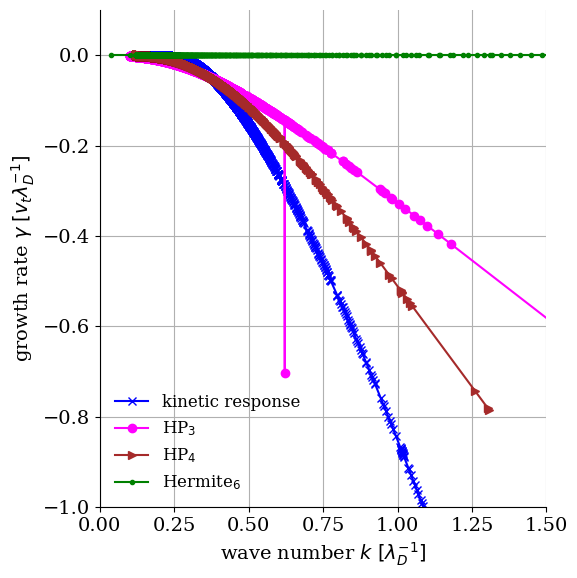

In [52]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(k_true, gr_true*np.sqrt(2)*k_true, label=r"kinetic response", c="blue", marker="x")
ax.plot(k_hp3,  gr_hp3*np.sqrt(2)*k_hp3, label=r"HP$_{3}$", c="magenta", marker="o")
ax.plot(k_hp4,  gr_hp4*np.sqrt(2)*k_hp4, label=r"HP$_{4}$", c="brown", marker=">")
ax.plot(k_l6,  gr_l6*np.sqrt(2)*k_l6, label=r"Hermite$_{6}$", c="green", marker=".")

ax.set_ylabel(r"growth rate $\gamma$ $[v_{t}\lambda_{D}^{-1}]$")
ax.set_xlabel(r"wave number $k$ $[\lambda_{D}^{-1}]$")
ax.set_ylim(-1, 0.1)
ax.set_xlim(0, 1.5)
legend = ax.legend(ncols=1, fancybox=False, shadow=False, fontsize=12, loc='lower left')
legend.get_frame().set_alpha(0)
plt.grid()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()

plt.savefig("figs/landau_damping_hp.png", dpi=200)

## Bump-on-tail dispersion relation

In [53]:
# Despersion relation
def disp_k_bot(xi, n1=0.8, u1=0, u2=3, T=1):
    return -n1*R(xi=(xi-u2)) - (1-n1)*R(xi=((xi-u1)/T))

# Despersion relation
def disp_k_hp3_bot(xi, n1=0.8, u1=0, u2=3, T=1):
    return -n1*RHP3(xi=(xi-u2)) - (1-n1)*RHP3(xi=(xi-u1)/T)

# Despersion relation
def disp_k_hp4_bot(xi, n1=0.8, u1=0, u2=3, T=1):
    return -n1*RHP4(xi=(xi-u2)) -(1-n1)*RHP4(xi=(xi-u1)/T)

# Despersion relation
def disp_k_6_bot(xi, n1=0.8, u1=0, u2=3, T=1):
    return -n1*R6(xi=(xi-u2)) -(1-n1)*R6(xi=(xi-u1)/T)

In [54]:
gr_true, k_true = get_landau_dispersion(func=disp_k_bot, xi_real=np.linspace(1E-2, 2, int(1e4)), xi_imag=np.linspace(0.001, 1, int(1e4)), tol=1e-6)

In [55]:
gr_hp3, k_hp3 = get_landau_dispersion(func=disp_k_hp3_bot, xi_real=np.linspace(0, 2, int(1e4)), xi_imag=np.linspace(0.001, 1, int(1e4)), tol=1e-6)

In [56]:
gr_hp4, k_hp4 = get_landau_dispersion(func=disp_k_hp4_bot, xi_real=np.linspace(0, 2, int(1e4)), xi_imag=np.linspace(0.001, 1, int(1e4)), tol=1e-6)

In [57]:
gr_l16, k_l16 = get_landau_dispersion(func=disp_k_6_bot, xi_real=np.linspace(0, 4, int(1e3)), xi_imag=np.linspace(0, 3, int(1e3)), tol=1e-3)

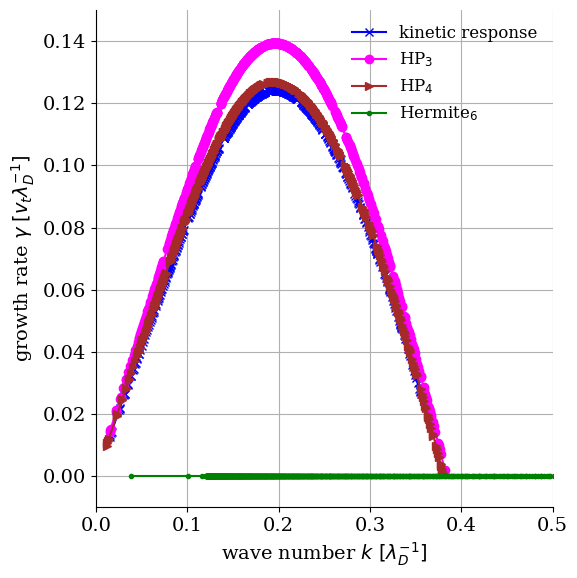

In [58]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(k_true, gr_true*np.sqrt(2)*k_true, label=r"kinetic response", c="blue", marker="x")
ax.plot(k_hp3,  gr_hp3*np.sqrt(2)*k_hp3, label=r"HP$_{3}$", c="magenta", marker="o")
ax.plot(k_hp4,  gr_hp4*np.sqrt(2)*k_hp4, label=r"HP$_{4}$", c="brown", marker=">")
ax.plot(k_l6,  gr_l6*np.sqrt(2)*k_l6, label=r"Hermite$_{6}$", c="green", marker=".")

ax.set_ylabel(r"growth rate $\gamma$ $[v_{t}\lambda_{D}^{-1}]$")
ax.set_xlabel(r"wave number $k$ $[\lambda_{D}^{-1}]$")
ax.set_ylim(-0.01, 0.15)
ax.set_xlim(0., 0.5)
legend = ax.legend(ncols=1, fancybox=False, shadow=False, fontsize=12, loc='upper right')
legend.get_frame().set_alpha(0)
plt.grid()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()

plt.savefig("figs/bump_on_tail_hp.png", dpi=200)